In [1]:
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

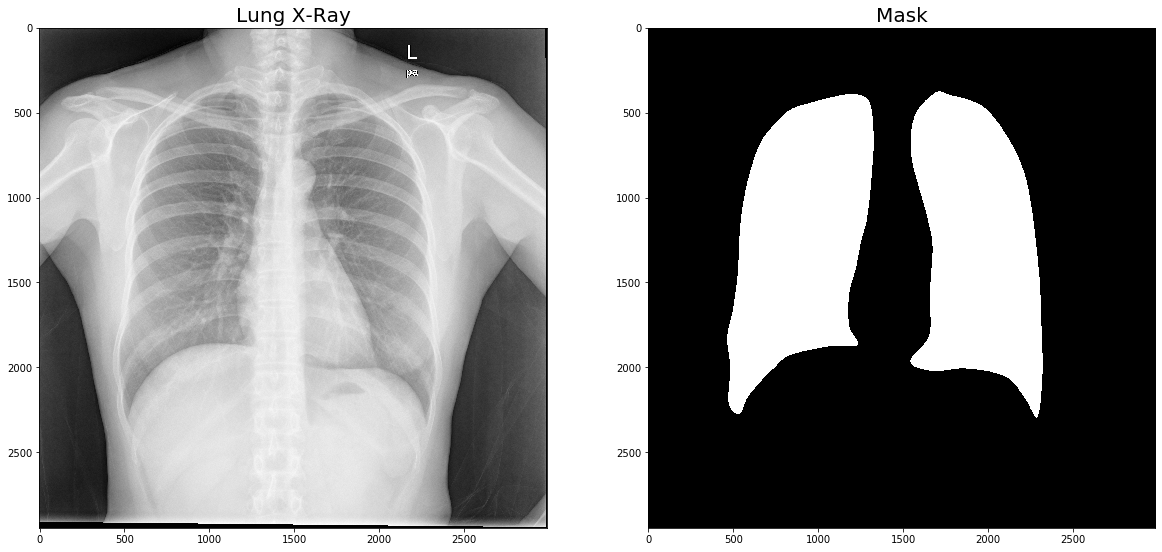

In [2]:
thermal = cv2.imread("thermal.bmp")
lungXR = cv2.imread("lung.png")
mask = cv2.imread("mask.png")

plt.figure(figsize=(20,10))
plt.subplot(121).set_title("Lung X-Ray", size=20), plt.imshow(cv2.cvtColor(lungXR, cv2.COLOR_BGR2RGB))
plt.subplot(122).set_title("Mask", size=20), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()

## 从RGB图像获取咽喉和双肩关键点

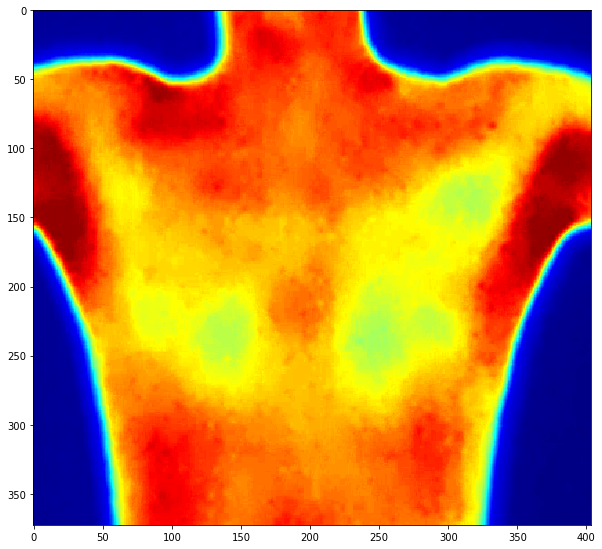

In [3]:
# 测量值
xray_ls = (200, 400)
xray_t = (1400, 0)
xray_rs = (2600, 400)

# RGB映射值
thermal_ls = (520, 370)
thermal_t = (680, 320)
thermal_rs = (850, 370)

x_ratio = (thermal_rs[0]-thermal_ls[0])/(xray_rs[0]-xray_ls[0])
y_ratio = (thermal_ls[1]-thermal_t[1])/(xray_ls[1]-xray_t[1])

x0 = int(thermal_ls[0] - xray_ls[0] * x_ratio)
y0 = int(thermal_ls[1] - xray_ls[1] * y_ratio)
x1 = int(x0 + lungXR.shape[0] * x_ratio)
y1 = int(y0 + lungXR.shape[1] * y_ratio)
crop_thermal = thermal[y0:y1, x0:x1]

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_thermal, cv2.COLOR_BGR2RGB))
plt.show()

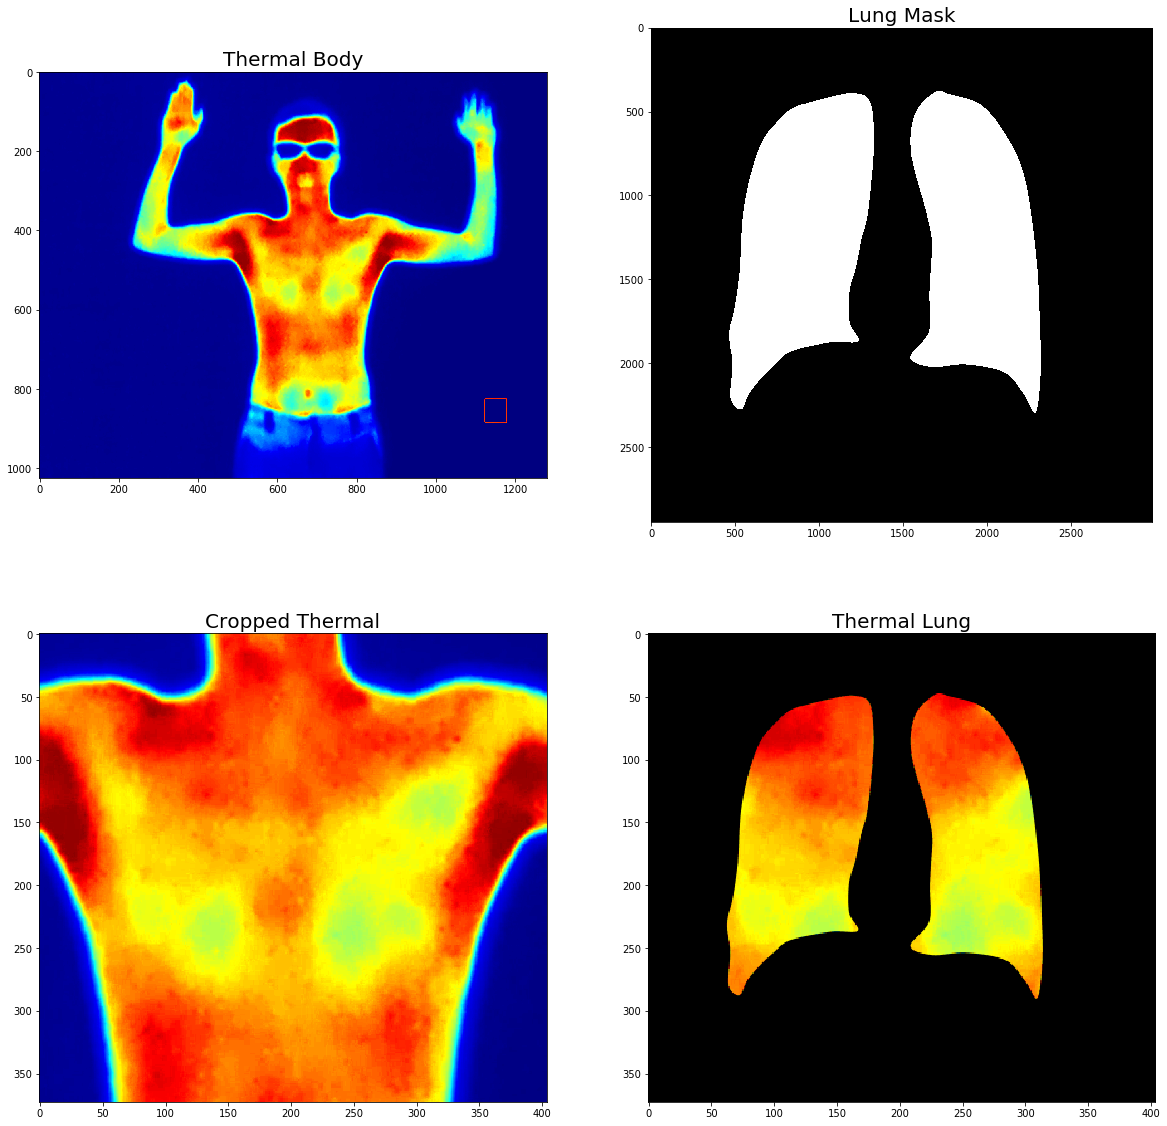

In [4]:
resized_mask = cv2.resize(mask, (x1-x0, y1-y0), interpolation = cv2.INTER_AREA)
thermal_lung = cv2.bitwise_and(crop_thermal, resized_mask)

fig = plt.figure(figsize=(20,20))
plt.subplot(221).set_title("Thermal Body", size=20), plt.imshow(cv2.cvtColor(thermal, cv2.COLOR_BGR2RGB))
plt.subplot(222).set_title("Lung Mask", size=20), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.subplot(223).set_title("Cropped Thermal", size=20), plt.imshow(cv2.cvtColor(crop_thermal, cv2.COLOR_BGR2RGB))
plt.subplot(224).set_title("Thermal Lung", size=20), plt.imshow(cv2.cvtColor(thermal_lung, cv2.COLOR_BGR2RGB))
plt.show()
fig.savefig('demo.png')

## 关键点展示

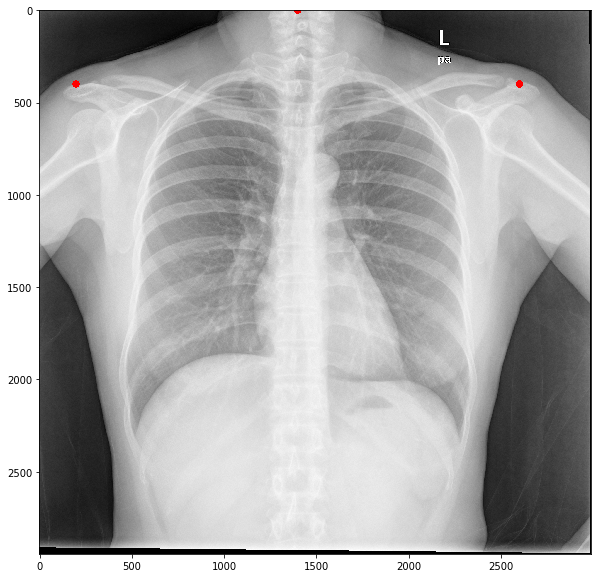

In [5]:
# Demo only
plt.figure(figsize=(10,10))

lungXR_demo = cv2.circle(lungXR, (200, 400), 20, (0, 0, 255), -1)
lungXR_demo = cv2.circle(lungXR, (1400, 0), 20, (0, 0, 255), -1)
lungXR_demo = cv2.circle(lungXR, (2600, 400), 20, (0, 0, 255), -1)
plt.imshow(cv2.cvtColor(lungXR_demo, cv2.COLOR_BGR2RGB))
plt.show()

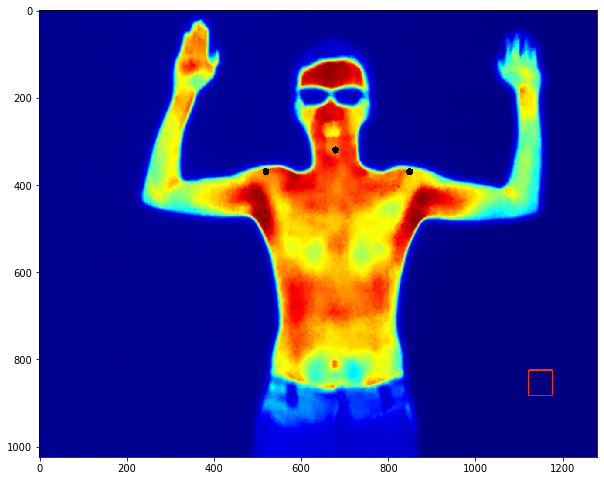

In [6]:
# Demo only
plt.figure(figsize=(10,10))

thermal_demo = cv2.circle(thermal, (520, 370), 8, (0, 0, 0), -1)
thermal_demo = cv2.circle(thermal, (680, 320), 8, (0, 0, 0), -1)
thermal_demo = cv2.circle(thermal, (850, 370), 8, (0, 0, 0), -1)
plt.imshow(cv2.cvtColor(thermal_demo, cv2.COLOR_BGR2RGB))
plt.show()